
## Modeling EEG signals using polynomial regression
Aayush Adhikari
220426@softwarica.edu.np

In [1]:
library(ggplot2)
library(GGally)
library(tidyverse)
library(tidymodels)
library(moments)
library(dplyr)
library(ggExtra)
library(readr)
library(ggpubr)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.2 --
v tibble  3.1.8     v dplyr   1.1.0
v tidyr   1.3.0     v stringr 1.5.0
v readr   2.1.3     v forcats 1.0.0
v purrr   1.0.1     
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
-- Attaching packages ------------------------------------------------------------------------------ tidymodels 1.0.0 --

v broom        1.0.3     v rsample      1.1.1
v dials        1.1.0     v tune         1.0.1
v infer        1.0.4     v workflows    1.1.2
v modeldata    1.1.0     v workflowsets 1.0.0
v parsnip      1.0.3     v yardstick    1.1.0
v recipes      1.0.4     

-- Conflicts -------------------------------------------------------------------------------

### Importing required library


In [2]:
library(ggplot2) # implementation of the grammar of graphics - complex visualizations
library(GGally)  # create a matrix of scatter plots, with histograms or density plots
library(tidyverse) # data manipulation, exploration, and visualization
library(tidymodels)  # Split the data into training and testing
library(moments) # calculating and plotting descriptive statistics
library(dplyr) # data manipulation toolkit for working with structured data
library(ggExtra) # additional functionality to ggplot2
library(readr) # fast and friendly file reading
library(ggpubr) # customizing ggplot2 based publication ready plots

#setting the theme to light 
theme_set(theme_light())

### Importing data set

In [3]:
# Importing X data
x=as.matrix(read.csv(file="X_1673241366257.csv",header = F))

In [5]:
# Importing Y data
y=as.matrix(read.csv(file="y_1673241374123.csv",header = F))

In [7]:
time = read.csv("time_1673241270748.csv", header = F, skip = 1)
time = as.matrix(rbind(0, time))


V1
0.000
0.002
0.004
0.006
0.008
0.010


In [8]:
colnames(x) <- paste0(rep("x", ncol(x)), 1:ncol(x)) 
colnames(y) <- "y"
colnames(time) <- "time"
df = cbind(time, x, y)

time,x1,x2,x3,x4,y
0.000,-3.073820,-1.855760,-2.775880,-0.288894,-0.09352727
0.002,0.349116,1.919060,1.004950,0.577845,0.32122440
0.004,-1.009700,0.272461,-0.912297,-2.697380,0.13822394
0.006,-0.807608,-1.581480,0.194378,-1.622270,0.35918981
0.008,2.079250,0.742812,1.928090,1.558220,0.75155170
0.010,3.249200,1.944610,1.799000,2.381060,1.41717093


In [9]:
colnames(x)<-c("x1","x2","x3","x4")
xmat <- as.matrix(x)

In [10]:
#Similar process as above for output data Y.

ymat <- as.matrix(y)


In [11]:
#Similar process as above for output data Y.

time_mat <- as.matrix(time)


## Task 1: Preliminary data analysis


### Task 1.1:  Plots of Input and Output Plot od EEG  Time Series Signals


In [12]:
time_mat <- as.matrix(time)


In [13]:
# Using is.na function to see 
missing_values <- is.na(df)
missvalues <- sum(missing_values)

print(sprintf("No of missing value in the dataset is %d", missvalues))

[1] "No of missing value in the dataset is 0"


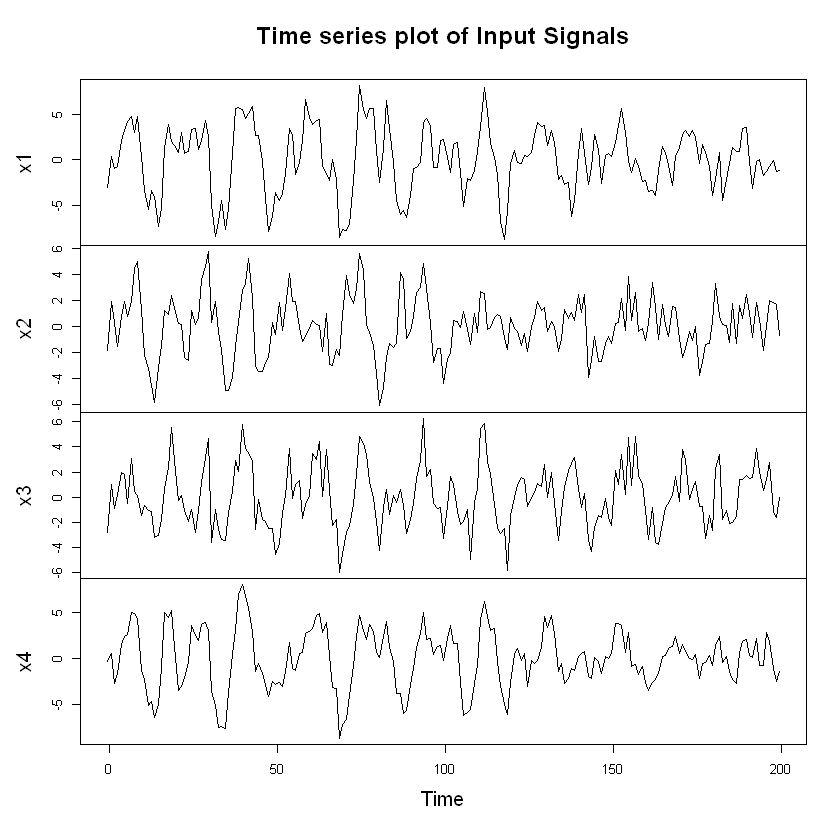

In [14]:
xmat.ts<-ts(xmat,start = c(min(time_mat),max(time_mat)),frequency =1)
plot(xmat.ts,main = "Time series plot of Input Signals", xlab = "Time", ylab = "Input signal")

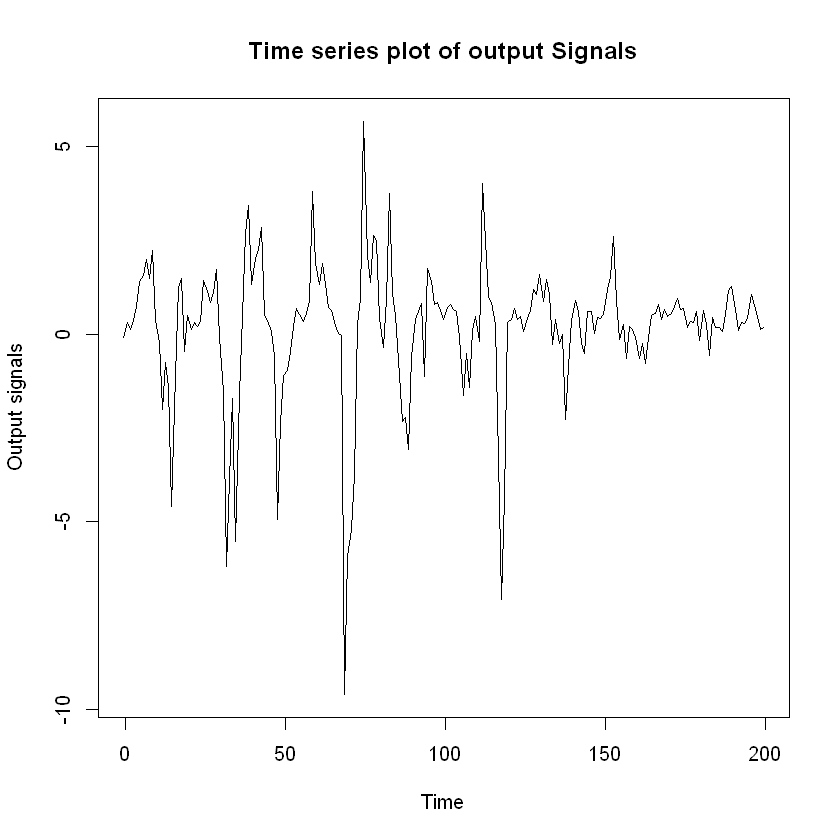

In [15]:
ymat.ts<-ts(ymat,start = c(min(time),max(time)),frequency =1)
plot(ymat.ts,main = "Time series plot of output Signals", xlab = "Time", ylab = "Output signals")

### Task 1.2: Distributions for each EEG signals


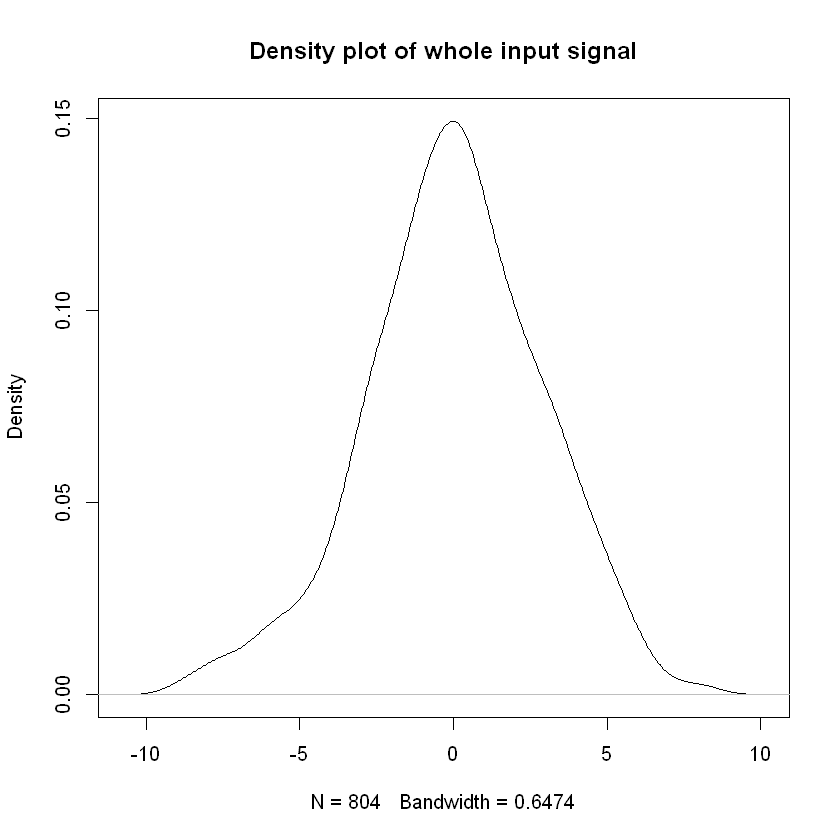

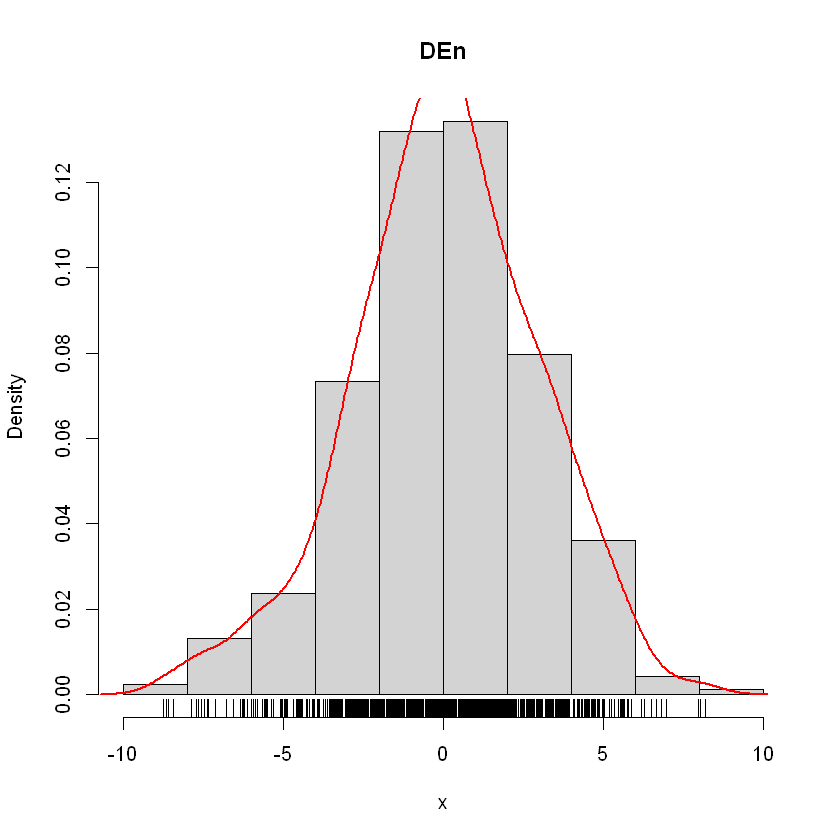

In [16]:
dis=density(x)
plot(dis,main = "Density plot of whole input signal")
# Creating a Histrogram of X signal
hist(x,freq = FALSE,main = "DEn")
#Adding density in the histogram
lines(dis,lwd=2,col="red")
rug(jitter(x))

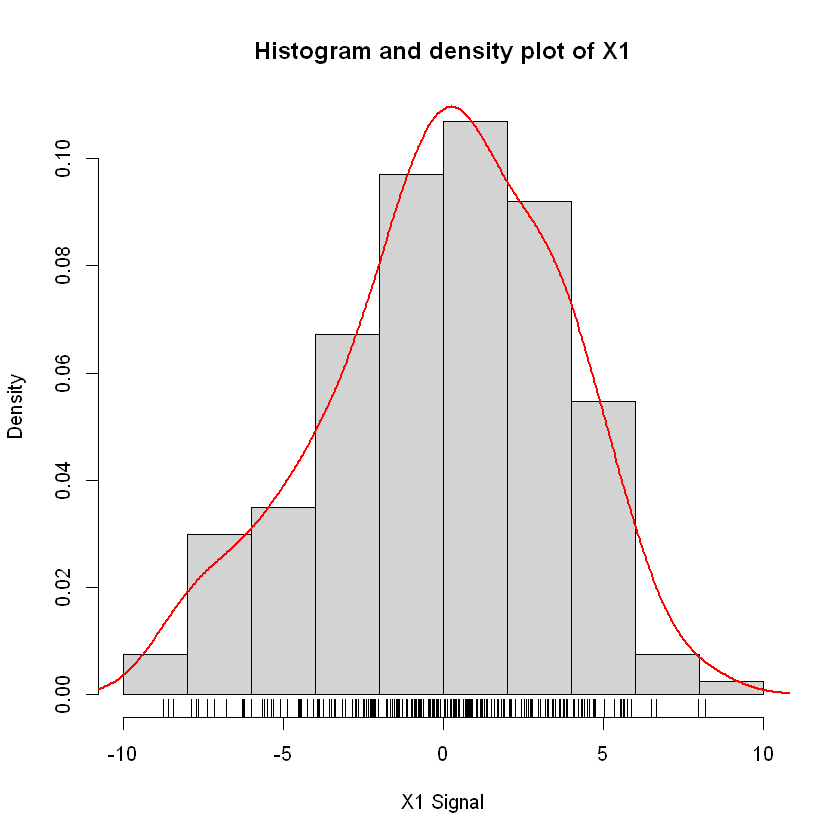

In [17]:
#Density plot of X1 signal
dis_X1=density(x[,"x1"])
hist(x[,"x1"],freq = FALSE,main = "Histogram and density plot of X1",xlab = "X1 Signal")
lines(dis_X1,lwd=2,col="red")
# Add the data-poins with noise in the X-axis
rug(jitter(x[,"x1"]))

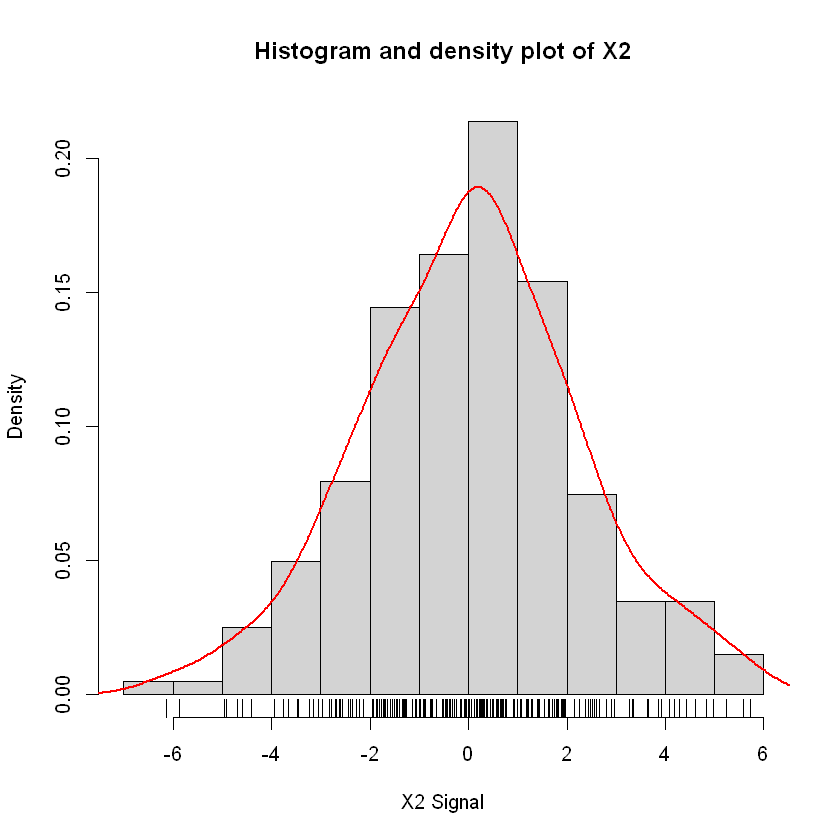

In [18]:
#Density plot of X2 signal
dis_X2=density(x[,"x2"])
hist(x[,"x2"],freq = FALSE,main = "Histogram and density plot of X2",xlab = "X2 Signal")
lines(dis_X2,lwd=2,col="red")
rug(jitter(x[,"x2"]))

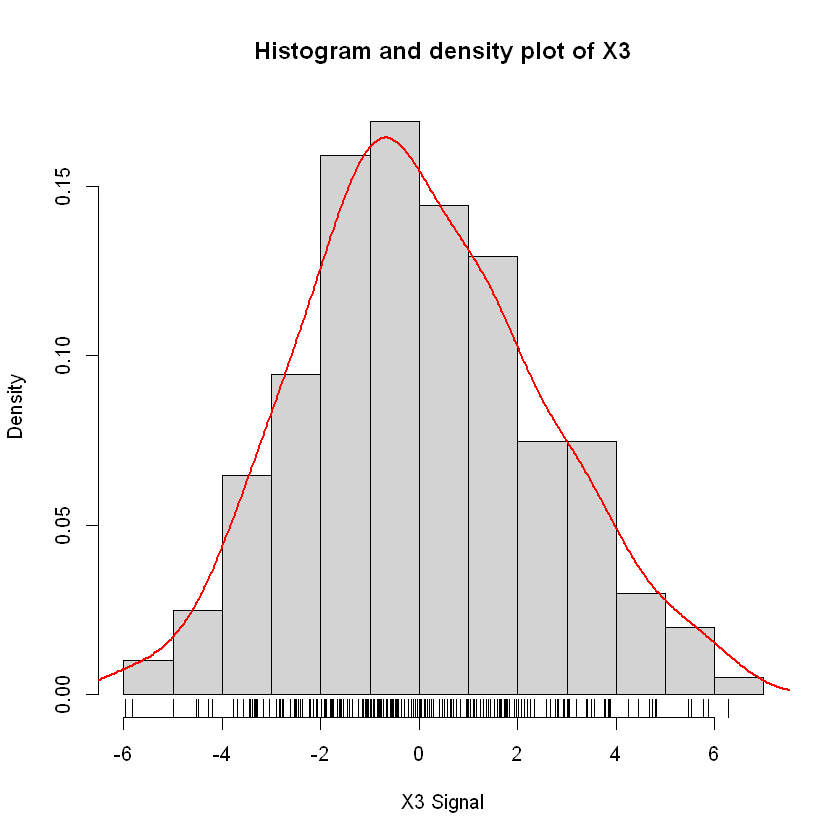

In [19]:
#Density plot of X3 signal
dis_X3=density(x[,"x3"])
hist(x[,"x3"],freq = FALSE,main = "Histogram and density plot of X3",xlab = "X3 Signal")
lines(dis_X3,lwd=2,col="red")
rug(jitter(x[,"x3"]))

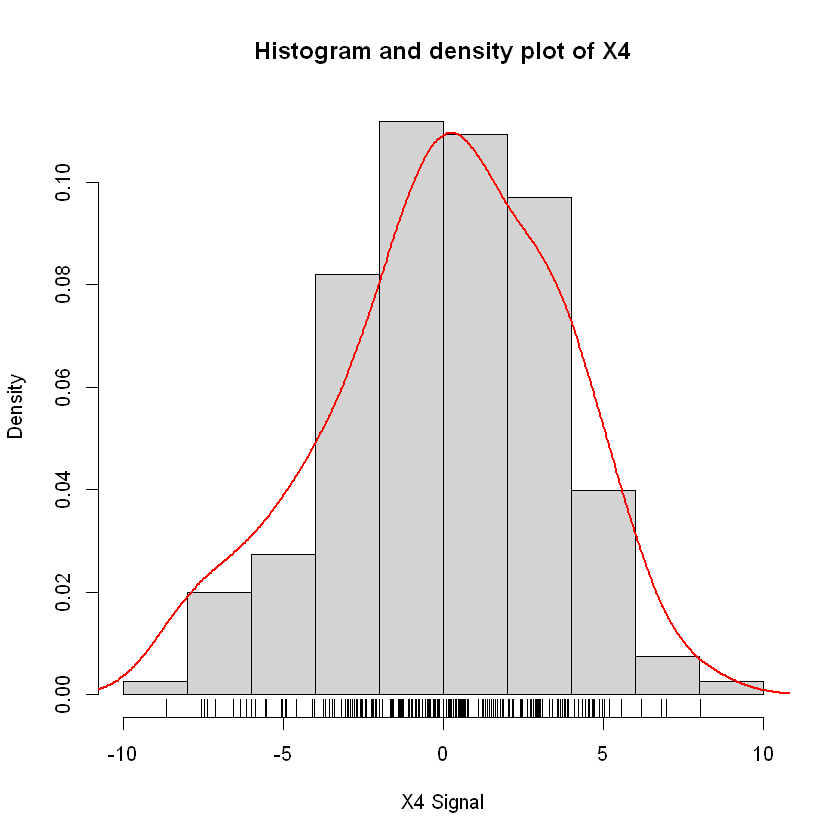

In [20]:
#Density plot of X4 signal
dis_X4=density(x[,"x4"])
hist(x[,"x4"],freq = FALSE,main = "Histogram and Density plot of X4",xlab = "X4 Signal")
lines(dis_X1,lwd=2,col="red")
rug(jitter(x[,"x4"]))

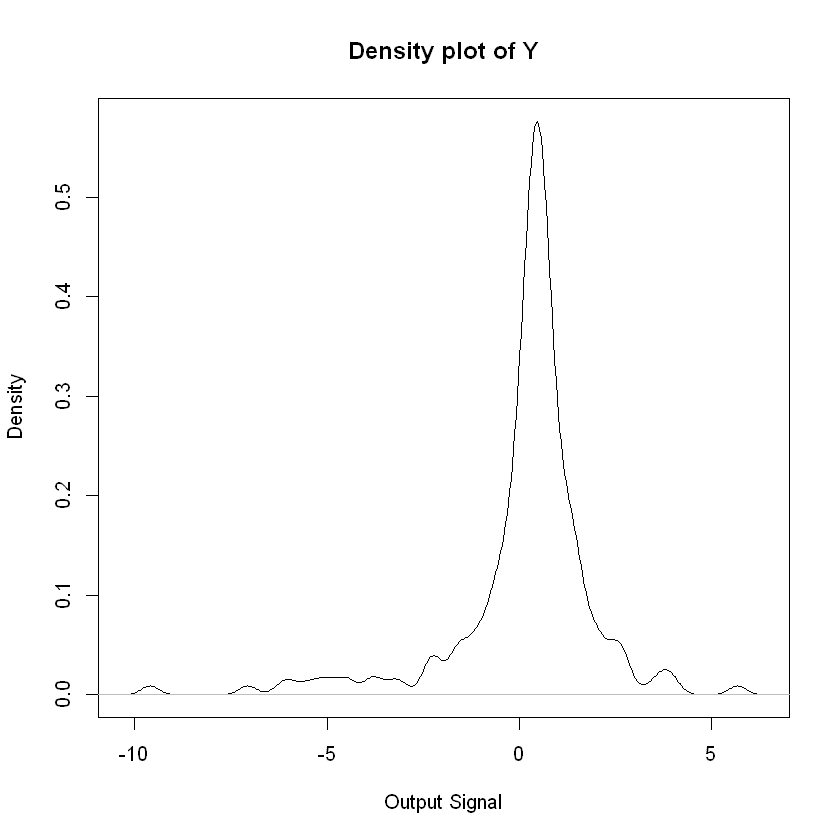

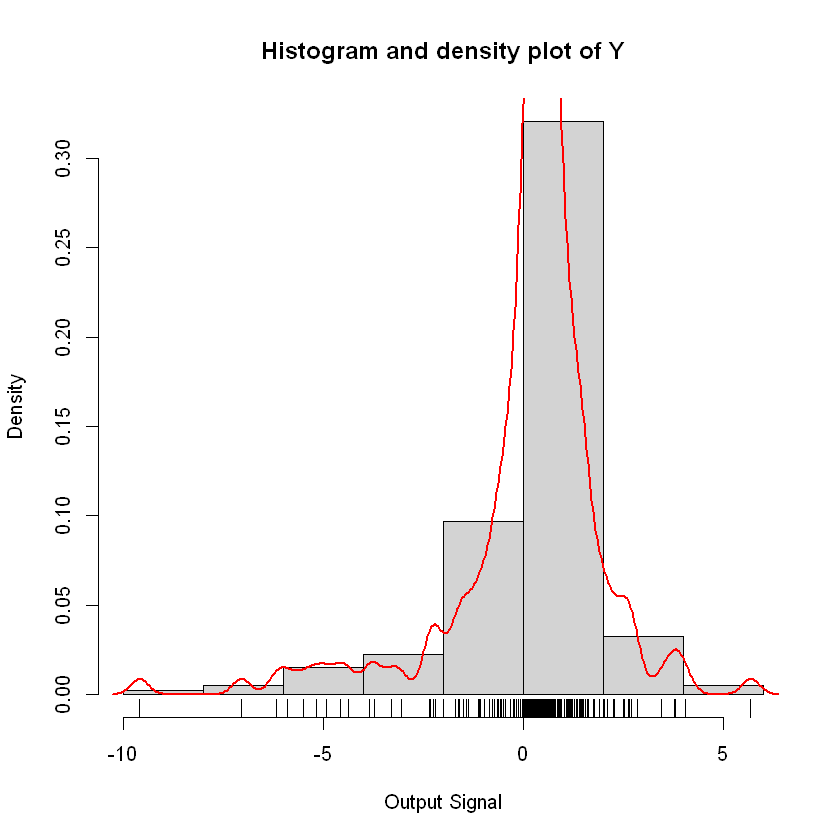

In [21]:
#Creating a density if Y signal
dis_y=density(y)
plot(dis_y,main = "Density plot of Y",xlab = "Output Signal")
hist(y,freq = FALSE,main = "Histogram and density plot of Y",xlab = "Output Signal")
lines(dis_y,lwd=2,col="red")
rug(jitter(y))


## Task 1.3: Correlation and scatter plots (between different input EEG signals and the output EEG) to examine their dependencies 

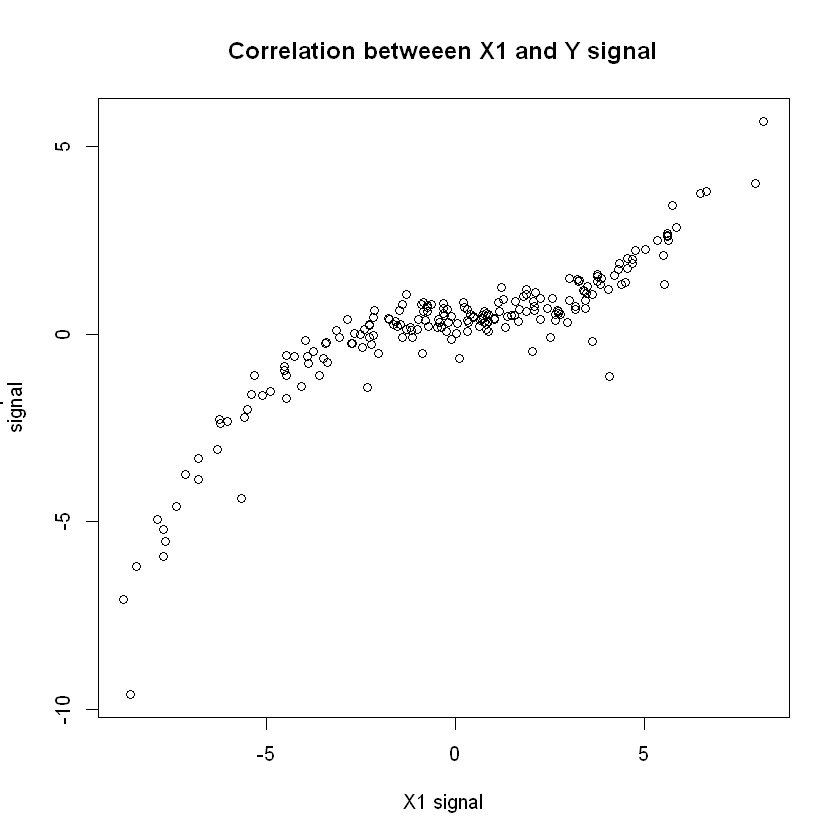

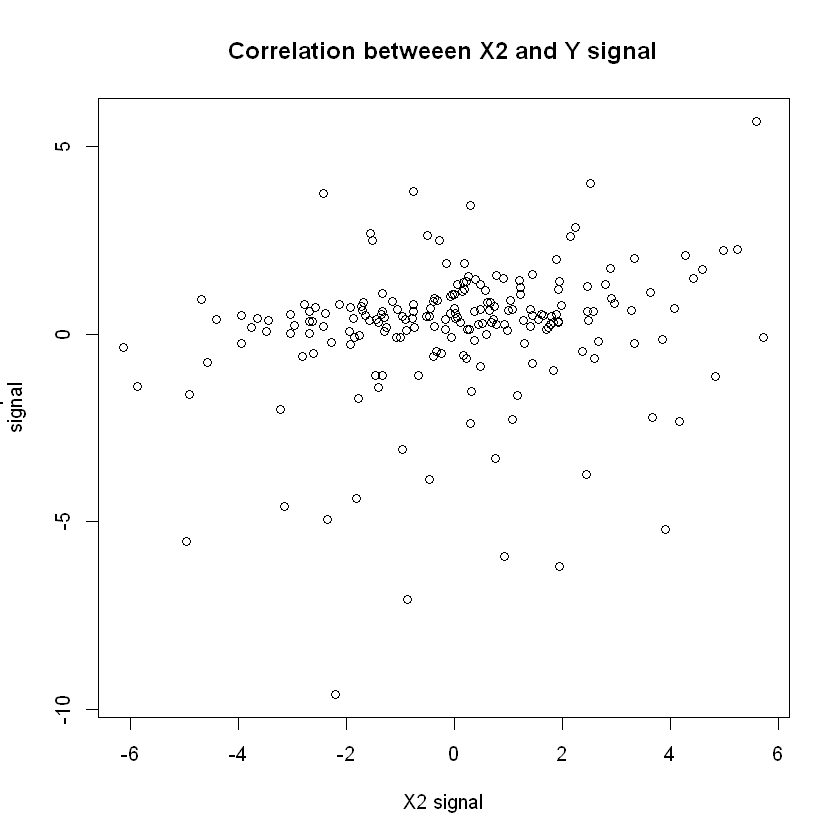

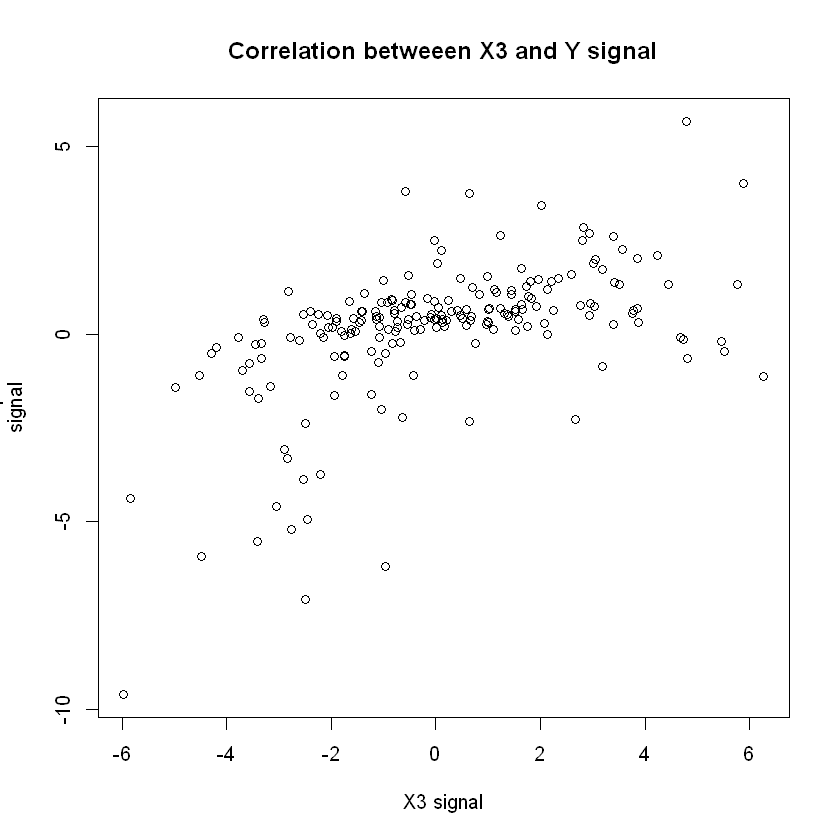

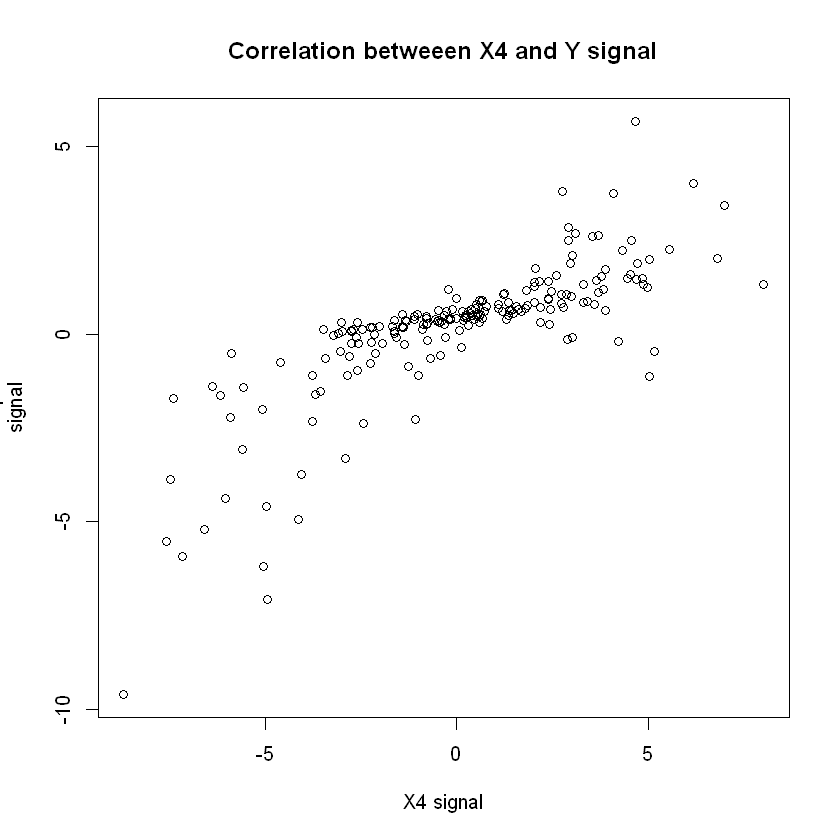

In [22]:
# Plot of X1 against Y
plot(x[,"x1"],y,main = "Plot of Correlation betweeen X1 and Y signal", xlab = "X1 signal", ylab = "Output
signal" )

# Plot of X2 against Y
plot(x[,"x2"],y,main = "Plot of Correlation betweeen X2 and Y signal", xlab = "X2 signal", ylab = "Output
signal")
# Plot of X3 against Y
plot(x[,"x3"],y,main = "Plot of Correlation betweeen X3 and Y signal", xlab = "X3 signal", ylab = "Output
signal")
# Plot of X4 against Y
plot(x[,"x4"],y,main = "Plot of Correlation betweeen X4 and Y signal", xlab = "X4 signal", ylab = "Output
signal")


## Task 2: Regression – modeling the relationship between EEG signals

### Task 2.1: Using least square, estimating model parameter


In [23]:
ones = matrix(1 , length(x)/4,1) 
#The resulting data frame "x_model_1" will have the same number of rows as the input variable "x" but new colum will be added,

x_model_1<-cbind(ones,(x[,"x4"]),(x[,"x1"])^2,(x[,"x1"])^3,(x[,"x2"])^4,(x[,"x1"])^4)


1,-0.288894,9.4483694,-29.04258681,11.860069607,89.27168418
1,0.577845,0.1218820,0.04255095,13.562951639,0.01485522
1,-2.697380,1.0194941,-1.02938318,0.005510835,1.03936820
1,-1.622270,0.6522307,-0.52674672,6.255396116,0.42540486
1,1.558220,4.3232806,8.98918111,0.304449766,18.69075482
1,2.381060,10.5573006,34.30278124,14.299803148,111.45659680


In [24]:
# We are converting thus obtained dataframe x_model_1  into a matrix using the function as.matrix(). The transpose of the matrix is taken using the function t(). The operator %*% is used for matrix multiplication under solve() function.

theta_hat_1 <- solve(t(as.matrix(x_model_1)) %*% as.matrix(x_model_1)) %*% t(as.matrix(x_model_1)) %*% as.matrix(y)


                 y
[1,]  0.4015807794
[2,]  0.1277101097
[3,] -0.0002902170
[4,]  0.0096688129
[5,] -0.0004098917
[6,] -0.0001543367


# Task 2.1.2: Using least square estimating model parameter for model 2


In [25]:
# Binding for model 2
x_model_2<-cbind(ones,(x[,"x4"]),(x[,"x1"])^3,(x[,"x3"])^4)

# Calculating theta_hat_2
theta_hat_2 <- solve(t(as.matrix(x_model_2)) %*% as.matrix(x_model_2)) %*% t(as.matrix(x_model_2)) %*% as.matrix(y)


                y
[1,]  0.483065688
[2,]  0.143578928
[3,]  0.010038614
[4,] -0.001912836


# Task 2.1.3: Using least square, estimating model parameter for model 3


In [26]:
# Binding for model 3
x_model_3<-cbind(ones,(x[,"x3"])^3,(x[,"x3"])^4)

# Calculating theta_hat
theta_hat_3 <- solve(t(as.matrix(x_model_3)) %*% as.matrix(x_model_3)) %*% t(as.matrix(x_model_3)) %*% as.matrix(y)


                y
[1,]  0.340561975
[2,]  0.021330543
[3,] -0.002857744


# Task 2.1.4: Using least square, estimating model parameter for model 4


In [27]:
# Binding for model 4
x_model_4<-cbind(ones,(x[,"x2"]),(x[,"x1"])^3,(x[,"x3"])^4)

# Calculating theta_hat
theta_hat_4 <- solve(t(as.matrix(x_model_4)) %*% as.matrix(x_model_4)) %*% t(as.matrix(x_model_4)) %*% as.matrix(y)


                y
[1,]  0.509013488
[2,]  0.053322048
[3,]  0.012067145
[4,] -0.001855997


# Task 2.1.5: Using least square, estimating model parameter for model 5


In [28]:
# Binding for model 5
x_model_5 <- cbind(ones,(x[,"x4"]),(x[,"x1"])^2,(x[,"x1"])^3,(x[,"x3"])^4)

# Calculating theta_hat
theta_hat_5 <- solve(t(as.matrix(x_model_5)) %*% as.matrix(x_model_5)) %*% t(as.matrix(x_model_5)) %*% as.matrix(y)


                 y
[1,]  0.4798284629
[2,]  0.1434460704
[3,]  0.0003254641
[4,]  0.0100562759
[5,] -0.0019198749


# Task 2.2: Calculation of model residual errors (RSS)


#### Task 2.2.1: Calculation of model residual errors (RSS) for model 1


In [29]:
# Calculation of Y-hat and RSS model 1

# Before that we convert our model and theta hat into matrix
x_model_1 <- as.matrix(x_model_1)
theta_hat_1 <- as.matrix(theta_hat_1)


Y_hat_model_1 <- x_model_1 %*% theta_hat_1



# Calculation of RSS using above mentioned formula

RSS_model_1 <- sum((y - Y_hat_model_1)^2)

# printing RSS value for model 1
print(sprintf("RSS value of the model 1 =  %0.4f", RSS_model_1))

[1] "RSS value of the model 1 is 35.3966"


### Task 2.2.2: Calculation of model residual errors (RSS) for model 2

In [30]:
# Calculation of Y-hat and RSS model 2

# Before that we convert our model and theta hat into matrix
x_model_2 <- as.matrix(x_model_2)
theta_hat_2 <- as.matrix(theta_hat_2)


Y_hat_model_2 <- x_model_2 %*% theta_hat_2



# Calculation of RSS using above mentioned formula

RSS_model_2 <- sum((y - Y_hat_model_2)^2)

# printing RSS value for model 2

print(sprintf("RSS value of the model 2 =  %0.4f", RSS_model_2))

[1] "RSS value of the model 2 is 2.1398"


#### Task 2.2.3: Calculation of model residual errors (RSS) for model 3


In [31]:
# Calculation of Y-hat and RSS model 3

# Before that we convert our model and theta hat into matrix
x_model_3 <- as.matrix(x_model_3)
theta_hat_3 <- as.matrix(theta_hat_3)


Y_hat_model_3 <- x_model_3 %*% theta_hat_3



# Calculation of RSS using above mentioned formula

RSS_model_3 <- sum((y - Y_hat_model_3)^2)

# printing RSS value for model 3

print(sprintf("RSS value of the model 3 =  %0.4f", RSS_model_3))

[1] "RSS value of the model 3 is 463.3124"


#### Task 2.2.4: Calculation of model residual errors (RSS) for model 4


In [32]:
# Calculation of Y-hat and RSS model 4

# Before that we convert our model and theta hat into matrix
x_model_4 <- as.matrix(x_model_4)
theta_hat_4 <-  as.matrix(theta_hat_4)


Y_hat_model_4 <- x_model_4 %*% theta_hat_4



# Calculation of RSS using above mentioned formula

RSS_model_4 <- sum((y - Y_hat_model_4)^2)

# printing RSS value for model 4

print(sprintf("RSS value of the model =  is %0.4f", RSS_model_4))

[1] "RSS value of the model 4 is 20.2590"


#### Task 2.2.5: Calculation of model residual errors (RSS) for model 5


In [33]:
# Calculation of Y-hat and RSS model 5

# Before that we convert our model and theta hat into matrix
x_model_5 <- as.matrix(x_model_5)
theta_hat_5 <- as.matrix(theta_hat_5)


Y_hat_model_5 <- x_model_5 %*% theta_hat_5



# Calculation of RSS using above mentioned formula

RSS_model_5 <- sum((y - Y_hat_model_5)^2)

# printing RSS value for model 5

print(sprintf("RSS value of the model 5 =  is %0.4f", RSS_model_5))

[1] "RSS value of the model 5 is 2.1355"


### Task 2.3: Calculation of log-likelihood functions


In [34]:
# Calculation of length of the output signal y with nrow()  as our data are in matrix format and storing it in N

N <- nrow(y)


# Calculation of the variance of model 1

Variance_model_1 = RSS_model_1/(N-1)

# Printing variance of model 1

print(sprintf("Calculated variance of model 1 =  %0.4f", Variance_model_1))

[1] "Variance of model 1 is 0.1770"


In [35]:
# Calculation of the log-likelihood of model 1 using model residual error (RSS)

likehood_model_1 <- -(N/2)*(log(2*pi))-(N/2)*(log(Variance_model_1))-(1/(2*Variance_model_1))*RSS_model_1

# Printing log likelihood function of model 1
print(sprintf("Calculated Log-likelihood of model 1 =  %0.4f", likehood_model_1))

[1] "Log-likelihood of model 1 is -110.6707"


#### Task 2.3.2:Calculation of log-likelihood functions for model 2


In [36]:
# Calculation of the variance of model 2

Variance_model_2 = RSS_model_2/(N-1)

# Printing variance of model 2

print(sprintf("Calculated variance of model 2 = %0.4f", Variance_model_2))

# Calculation of the log-likelihood of model 2 using model residual error (RSS)

likehood_model_2 <- -(N/2)*(log(2*pi))-(N/2)*(log(Variance_model_2))-(1/(2*Variance_model_2))*RSS_model_2

# Printing log likelihood function of model 2
print(sprintf("Calculated Log-likelihood of model 2 =  %0.4f", likehood_model_2))

[1] "Variance of model 2 is 0.0107"
[1] "Log-likelihood of model 2 is 171.3245"


#### Task 2.3.3: Calculation of log-likelihood functions for model 3


In [37]:
# Calculation of the variance of model 3

Variance_model_3 = RSS_model_3/(N-1)

# Printing variance of model 3

print(sprintf("Calculated variance of model 3 is %0.4f", Variance_model_3))


# Calculation of the log-likelihood of model 3 using model residual error (RSS)

likehood_model_3 <- -(N/2)*(log(2*pi))-(N/2)*(log(Variance_model_3))-(1/(2*Variance_model_3))*RSS_model_3

# Printing log likelihood function of model 3
print(sprintf("Calculated Log-likelihood of model 3 =  %0.4f", likehood_model_3))

[1] "Variance of model 3 is 2.3166"
[1] "Log-likelihood of model 3 is -369.1351"


#### Task 2.3.4: Calculation of log-likelihood functions for model 4

In [38]:
# Calculation of the variance of model 4

Variance_model_4 = RSS_model_4/(N-1)

# Printing variance of model 4

print(sprintf("Calculated variance of model 4 is %0.4f", Variance_model_4))


# Calculation of the log-likelihood of model 4 using model residual error (RSS)

likehood_model_4 <- -(N/2)*(log(2*pi))-(N/2)*(log(Variance_model_4))-(1/(2*Variance_model_4))*RSS_model_4

# Printing log likelihood function of model 4
print(sprintf("Calculated Log-likelihood of model 4 = %0.4f", likehood_model_4))

[1] "Variance of model 4 is 0.1013"
[1] "Log-likelihood of model 4 is -54.5899"


#### Task 2.3.5: Calculation of log-likelihood functions for model 5


In [39]:
# Calculation of the variance of model 5

Variance_model_5 = RSS_model_5/(N-1)

# Printing variance of model 5

print(sprintf("Calculated variance of model 5 = %0.4f", Variance_model_5))


# Calculation of the log-likelihood of model 5 using model residual error (RSS)

likehood_model_5 <- -(N/2)*(log(2*pi))-(N/2)*(log(Variance_model_5))-(1/(2*Variance_model_5))*RSS_model_5

# Printing log likelihood function of model 5
print(sprintf("Calculated Log-likelihood of model 5 = %0.4f", likehood_model_5))

[1] "Variance of model 5 is 0.0107"
[1] "Log-likelihood of model 5 is 171.5247"


#### Task 2.4: Calculation of Akaike information criterion and Bayesian Information Criteria

#### Task 2.4.1.1: Calculation of AIC for model 1


In [40]:
# Calculation of AIC for model 1. 
# Here we are finding value of K with length() function.

AIC_1 <- 2* length(x_model_1[1,]) - 2 * likehood_model_1

print(sprintf("Length of parameter to be estimated in model 1 is %d", length(x_model_1[1,])))

# AIC of model 1
print(sprintf("Calculated AIC of model 1 is %0.4f", AIC_1))

# Calculation of AIC for model 2. 


AIC_2 <- 2* length(x_model_2[1,]) - 2 * likehood_model_2

print(sprintf("Length of parameter to be estimated in model = is %d", length(x_model_2[1,])))

# AIC of model 2
print(sprintf("Calculated AIC of model 2 = %0.4f", AIC_2))

[1] "Length of parameter to be estimated in model 1 is 6"
[1] "AIC of model 1 is 233.3414"
[1] "Length of parameter to be estimated in model 2 is 4"
[1] "AIC of model 2 is -334.6489"


#### Task 2.4.1.2: Calculation of AIC for model 2


In [41]:
# Calculation of AIC for model 2. 


AIC_2 <- 2* length(x_model_2[1,]) - 2 * likehood_model_2

print(sprintf("Length of parameter to be estimated in model 2 = %d", length(x_model_2[1,])))

# AIC of model 2
print(sprintf("Calculated AIC of model 2 = %0.4f", AIC_2))

[1] "Length of parameter to be estimated in model 2 is 4"
[1] "AIC of model 2 is -334.6489"


#### Task 2.4.1.3: Calculation of AIC for model 3


In [42]:
# Calculation of AIC for model 3. 


AIC_3 <- 2* length(x_model_3[1,]) - 2 * likehood_model_3

print(sprintf("Length of parameter to be estimated in model 3 = %d", length(x_model_3[1,])))

# AIC of model 3
print(sprintf("Calculated AIC of model 3 = %0.4f", AIC_3))

[1] "Length of parameter to be estimated in model 3 is 3"
[1] "AIC of model 3 is 744.2702"


#### Task 2.4.1.4: Calculation of AIC for model 4


In [43]:
# Calculation of AIC for model 4. 


AIC_4 <- 2* length(x_model_4[1,]) - 2 * likehood_model_4

print(sprintf("Length of parameter to be estimated in model 4 = %d", length(x_model_4[1,])))

# AIC of model 4
print(sprintf("Calculated AIC of model 4 = %0.4f", AIC_4))


[1] "Length of parameter to be estimated in model 4 is 4"
[1] "AIC of model 4 is 117.1799"


##### Task 2.4.1.5:Calculation of AIC for model 5


In [44]:
# Calculation of AIC for model 5. 


AIC_5 <- 2* length(x_model_5[1,]) - 2 * likehood_model_5

print(sprintf("Length of parameter to be estimated in model 5 = %d", length(x_model_5[1,])))

# AIC of model 5
print(sprintf("Calculated AIC of model 5 = %0.4f", AIC_5))

[1] "Length of parameter to be estimated in model 5 is 5"
[1] "AIC of model 5 is -333.0493"


### Task 2.4.2: Calculation of BIC for each models


#### Task 2.4.2.1: Calculation of BIC for model 1


In [45]:
# Calculation of BIC for model 1 

BIC_1 <- length(x_model_1[1,]) * log(N) - 2 * likehood_model_1


# BIC of model 1
print(sprintf("Calculated BIC of model 1 =  %0.4f", BIC_1))



[1] "BIC of model 1 is 253.1613"


#### Task 2.4.2.2: Calculation of BIC for model 2


In [46]:
# Calculation of BIC for model 2

BIC_2 <- length(x_model_2[1,]) * log(N) - 2 * likehood_model_2


# BIC of model 2
print(sprintf("Calculated BIC of model 2 = %0.4f", BIC_2))

[1] "BIC of model 2 is -321.4357"


#### Task 2.4.2.3: Calculation of BIC for model 3


In [47]:
# Calculation of BIC for model 3 

BIC_3 <- length(x_model_3[1,]) * log(N) - 2 * likehood_model_3


# BIC of model 3

print(sprintf("Calculated BIC of model 3 = %0.4f", BIC_3))

[1] "BIC of model 3 is 754.1801"


#### Task 2.4.2.4: Calculation of BIC for model 4


In [48]:
# Calculation of BIC for model 4

BIC_4 <- length(x_model_4[1,]) * log(N) - 2 * likehood_model_4


# BIC of model 4

print(sprintf("Calculated BIC of model 4 = %0.4f", BIC_4))

[1] "BIC of model 4 is 130.3931"


#### Task 2.4.2.5: Calculation of BIC for model 5

In [49]:
# Calculation of BIC for model 5

BIC_5 <- length(x_model_5[1,]) * log(N) - 2 * likehood_model_5


# BIC of model 5

print(sprintf("Calculated BIC of model 5 = %0.4f", BIC_5))

[1] "BIC of model 5 is -316.5328"


## Task 2.5: Checking distribution of model prediction errors


In [50]:
##  Error of models 1-5  based on calculation form Task 2.2
model_1_error <- y - Y_hat_model_1
model_2_error <- y - Y_hat_model_2
model_3_error <- y - Y_hat_model_3
model_4_error <- y - Y_hat_model_4
model_5_error <- y - Y_hat_model_5

### Task 2.5.2: Visualization of  prediction error with Q-Q plot


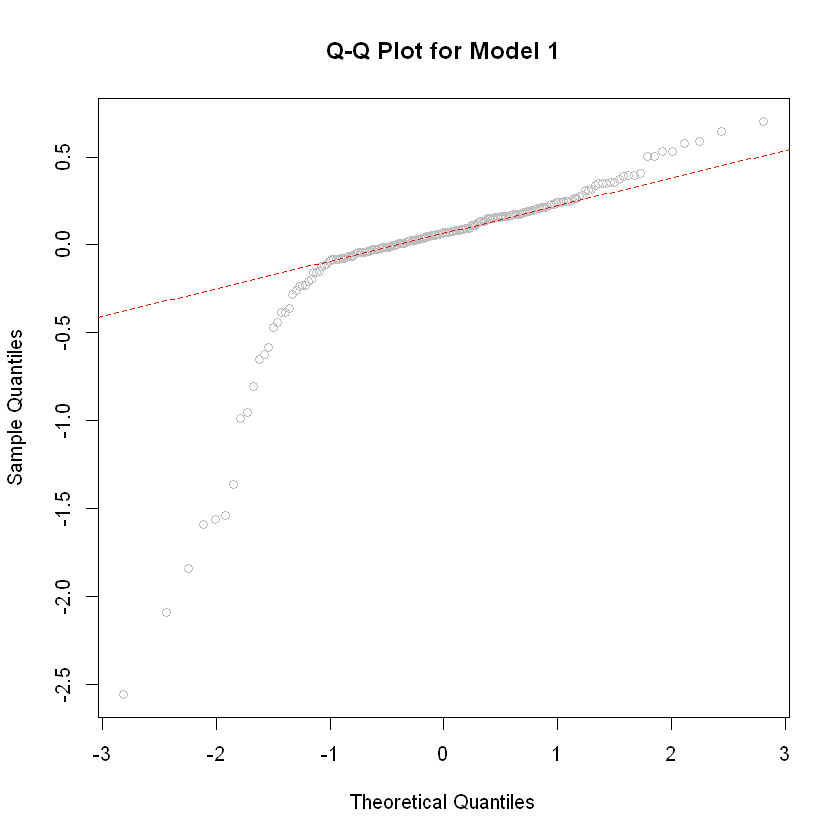

In [51]:
#  Visualization of Q-Q plots of prediction error for model 1

qqnorm(t(model_1_error),col = "grey", main = "Q-Q plots of prediction error for model 1" )
qqline(model_1_error, col = "green", lwd = 1,lty = 2)

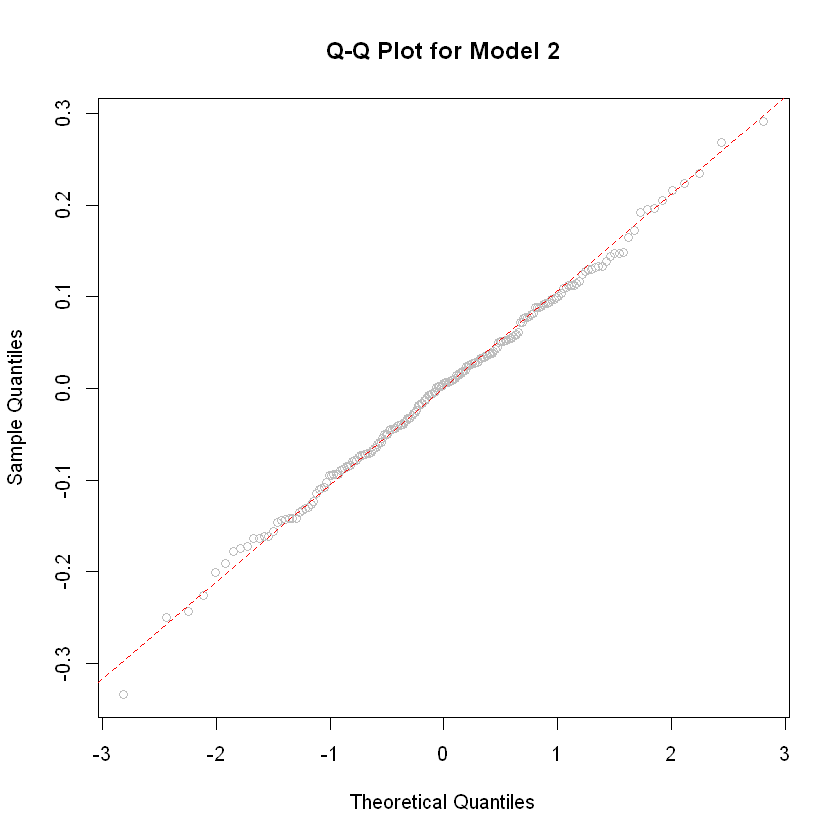

In [52]:
#  Visualization of  Q-Q plots of prediction error for model 2

qqnorm(t(model_2_error), col= "grey", main = "Q-Q plots of prediction error for model 2" )
qqline(model_2_error, col = "green", lwd = 1,lty = 2)

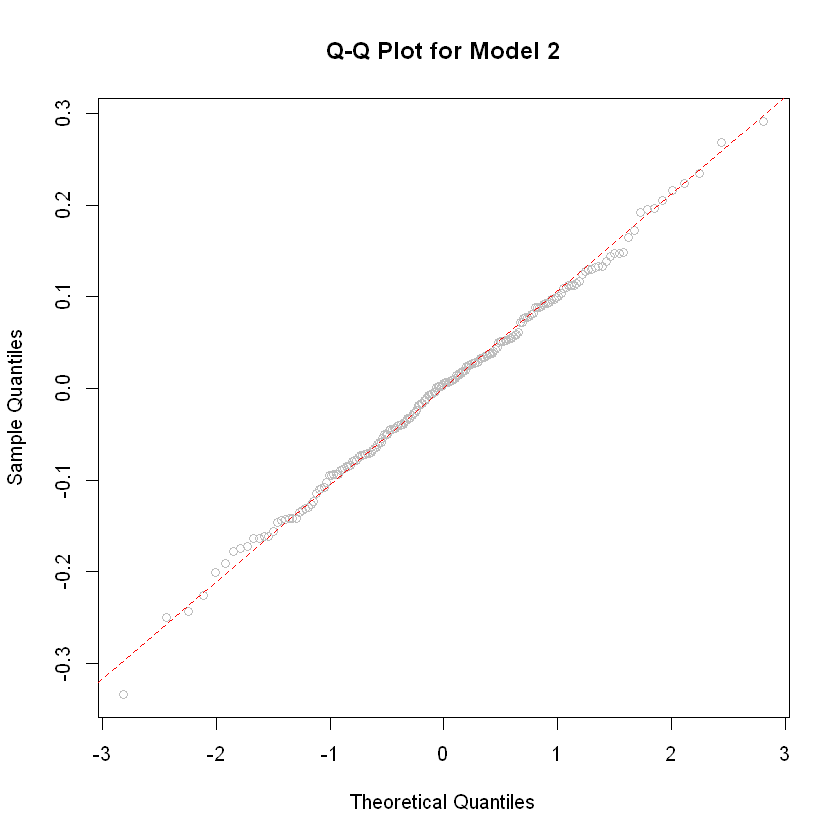

In [53]:
#  Visualization of  Q-Q plots of prediction error for model 2

qqnorm(t(model_2_error),col= "grey", main = "Q-Q plots of prediction error for model 2" )
qqline(model_2_error, col = "green", lwd = 1,lty = 2)

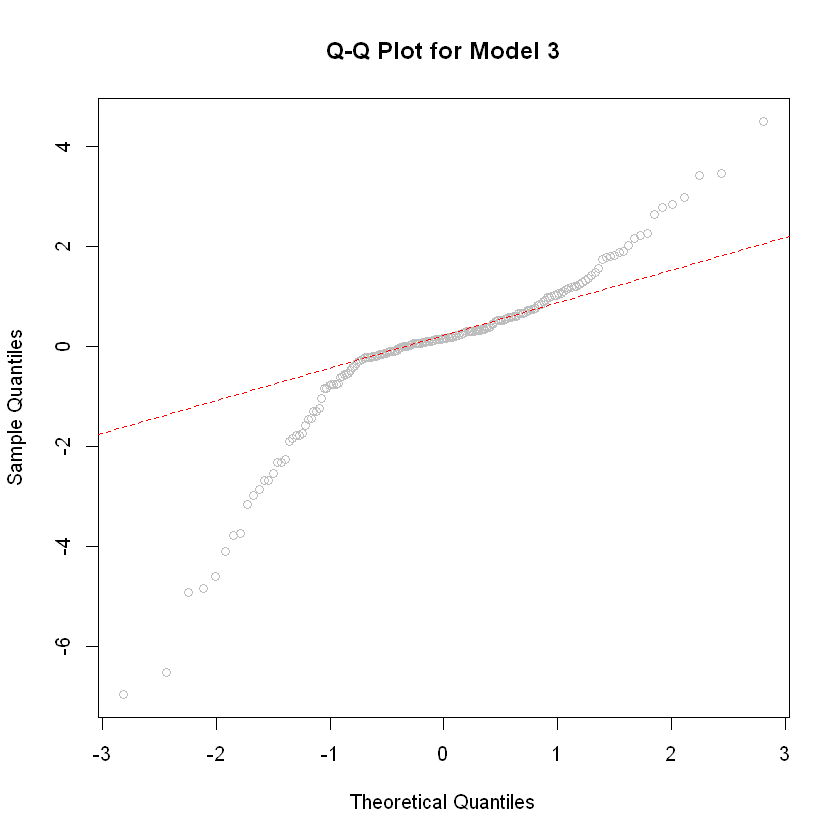

In [54]:
#  Visualization of  Q-Q plots of prediction error for model 3

qqnorm(t(model_3_error), col= "grey", main = "Q-Q plots of prediction error for model 3" )
qqline(model_3_error, col = "green", lwd = 1,lty = 2)

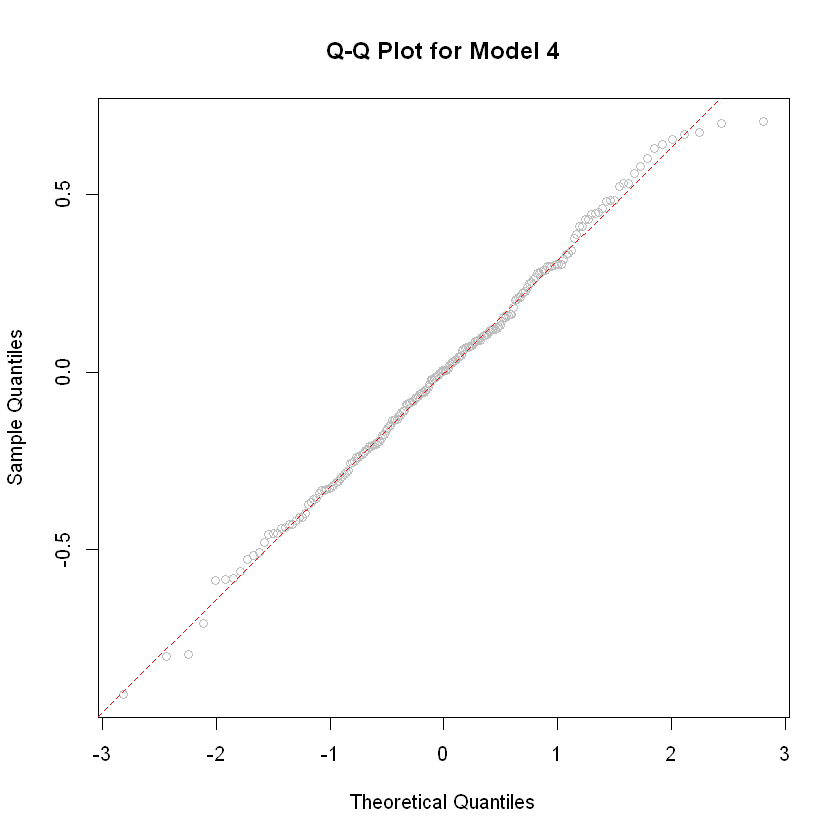

In [55]:
#  Visualization of  Q-Q plots of prediction error for model 4

qqnorm(t(model_4_error),col= "grey", main = "Q-Q plots of prediction error for model 4" )
qqline(model_4_error, col = "green", lwd = 1, lty = 2)

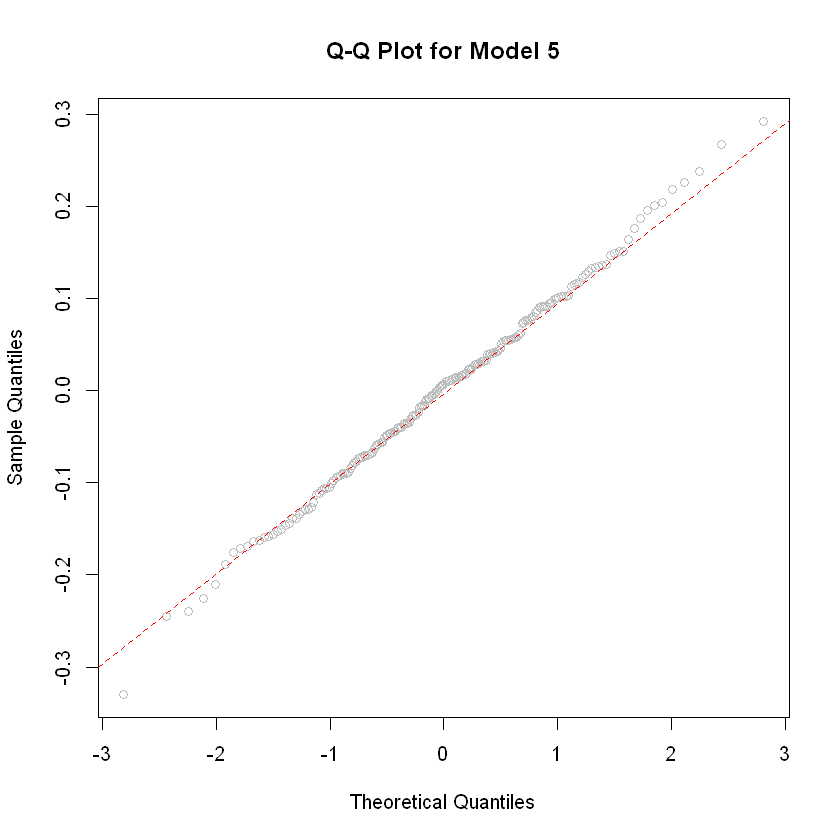

In [56]:
#  Visualization of Q-Q plots of prediction error for model 5

qqnorm(t(model_5_error), col= "grey",main = "Q-Q plots of prediction error for model 5" )
qqline(model_5_error, col = "green", lwd = 1,lty = 2)

## Task 2.6: Selecting Best regression model


Based on AIC and BIC, the best model fit would be model2 because it has lowest value. We will look at the Q-Q plot to verify the selected model 2 is good candidate.

Looking at the Q-Q plot, all models seems to have same nature  except model 3, So looking at the position of Q-Q line, the model 2 seems to be suitable one.

Now we would like to plot histogram to show distribution of residuals to get more incline to decision of picking up model 2.

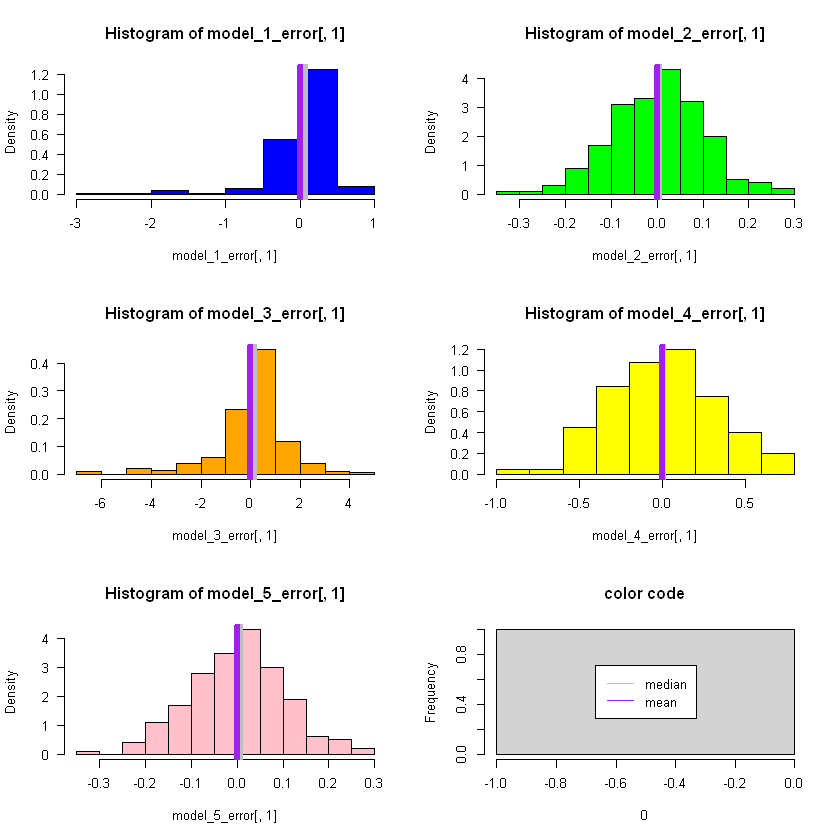

In [57]:
par(mfrow = c(3,2))
hist (model_1_error[,1], freq = FALSE, col="blue", las =1)
abline(v = median(model_1_error[,1]), col = "grey", lwd = 5)
abline(v = mean(model_1_error[,1]), col = "purple", lwd = 5)


hist (model_2_error[,1], freq = FALSE, col="green", las =1)
abline(v = median(model_2_error[,1]), col = "grey", lwd = 5)
abline(v = mean(model_2_error[,1]), col = "purple", lwd = 5)
# abline(v = getmode(model_2_error[,1]), col = "red", lwd = 5)

hist (model_3_error[,1], freq = FALSE, col="orange", las =1)
abline(v = median(model_3_error[,1]), col = "grey", lwd = 5)
abline(v = mean(model_3_error[,1]), col = "purple", lwd = 5)


hist (model_4_error[,1], freq = FALSE, col="yellow", las =1)
abline(v = median(model_4_error[,1]), col = "grey", lwd = 5)
abline(v = mean(model_4_error[,1]), col = "purple", lwd = 5)


hist (model_5_error[,1], freq = FALSE, col="pink", las =1)
abline(v = median(model_5_error[,1]), col = "grey", lwd = 5)
abline(v = mean(model_5_error[,1]), col = "purple", lwd = 5)


hist(0, main = "color code")
legend("center", legend = c("median","mean"),
       lwd = 1, col = c("grey", "purple"))

Observing the distribution of each mode, model 2 and 5 both seems to have normal distribution.

Now let us see if model 2 is suitable than other or not. Based on interpretability of the model, i.e., a simpler model with fewer parameters is way easier to interpret and understand. So let us see the number of parameter in each models.

Looking at the each length of parameter, the lowest is model 3 with 3 numbers of parameter, but its doesn’t follows a normal distribution and it is skewed and the next is model 4 having number of 4 parameters but its AIC and BIC is greater than the model 2.

In conclusion of AIC, BIC, Q-Q plot and extra interpretability, we have picked up model 2 as the best fit model and  which is expressed as:

Model 2: 𝑦 = 𝜃1 𝑥4 + 𝜃2 𝑥13 + 𝜃3 𝑥34 + 𝜃𝑏𝑖𝑎𝑠 + 𝜀

## Task 2.7: Splitting data for test and train for selected model 2


In [58]:
# Splitting input signals x

split_x <- initial_split(data = as.data.frame(x),prop=.7)


# Training  data for input signals x  are split and thus splitted training set is converted to matrix form ans assigned to the variable x_training_data 

x_training_set <- training(split_x)

x_training_data <- as.matrix(x_training_set)

# Testing data  are split  and thus splitted testing set is converted to matrix form ans assigned to the variable x_testing_data 

x_testing_set <- testing(split_x)

x_testing_data <- as.matrix(x_testing_set)



# Splitting the data of output signals y into train and test

split_y <- initial_split(data = as.data.frame(y),prop=.7)
 


# Training  data for output signals y  are split and thus splitted training set is converted to matrix form ans assigned to the variable y_training_data 

y_training_set <- training(split_y)

y_training_data <- as.matrix(y_training_set)

# Testing data for output signals y are splitted and thus splitted testing set is converted to matrix form ans assigned to the variable y_testing_data 

y_testing_set <- testing(split_y)

y_testing_data <- as.matrix(y_testing_set)

## Task 2.7.1: Estimation of model parameter for selected model 2 using training dataset


In [59]:
#   Estimation of model parameters using training set 

training_ones <- matrix(1, length(x_testing_set[["x1"]]),1) 


# cbind() is used to bind the matrix "ones" and other variables that are present in that model 1, together to create a new data frame, "x_model_1". 

#The resulting data frame "x_model_1" will have the same number of rows as the input variable "x" but new colum will be added,

training_model_x <- cbind(training_ones,(x_testing_set[["x4"]]),(x_testing_set[["x1"]])^3,(x_testing_set[["x3"]])^4)


training_thetahat <-   solve(t(training_model_x) %*% training_model_x) %*% t(training_model_x) %*% y_testing_data

## Task 2.7.2: Model output prediction on testing data set


In [60]:
#  y_testing_hat is being calculated as the product of the x_testing_data matrix and the estimated coefficients (training_thetahat) of the linear regression model.
# Here we get predicted values of y for the testing data.

y_testing_hat <- x_testing_data %*% training_thetahat


# Calculating residual sum of squares (RSS) for the testing data
RSS_testing <- sum((y_testing_set-y_testing_hat)^2) 


# Printing RSS value of testing 

print(sprintf("RSS value is testing data %0.4f", RSS_testing))

[1] "RSS value is testing data 256.4267"


## Task 2.7.3: Computation of 95% confidence interval and visualizaing


In [61]:
# Performing t-test on the training data. Here, mean is taken as a null hypothesis which value is equal to 700, 
# "two.sided"  is used which says that the true mean is not equal to the hypothesized mean and setting confidence interval 95%

t.test(y_testing_data, mu=500, alternative="two.sided", conf.level=0.95)


	One Sample t-test

data:  y_testing_data
t = -1874.7, df = 60, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 500
95 percent confidence interval:
 -0.6381153  0.4291057
sample estimates:
 mean of x 
-0.1045048 


Warning message in geom_density(col = "black", fill = "black", lw = 1):
"Ignoring unknown parameters: `lw`"


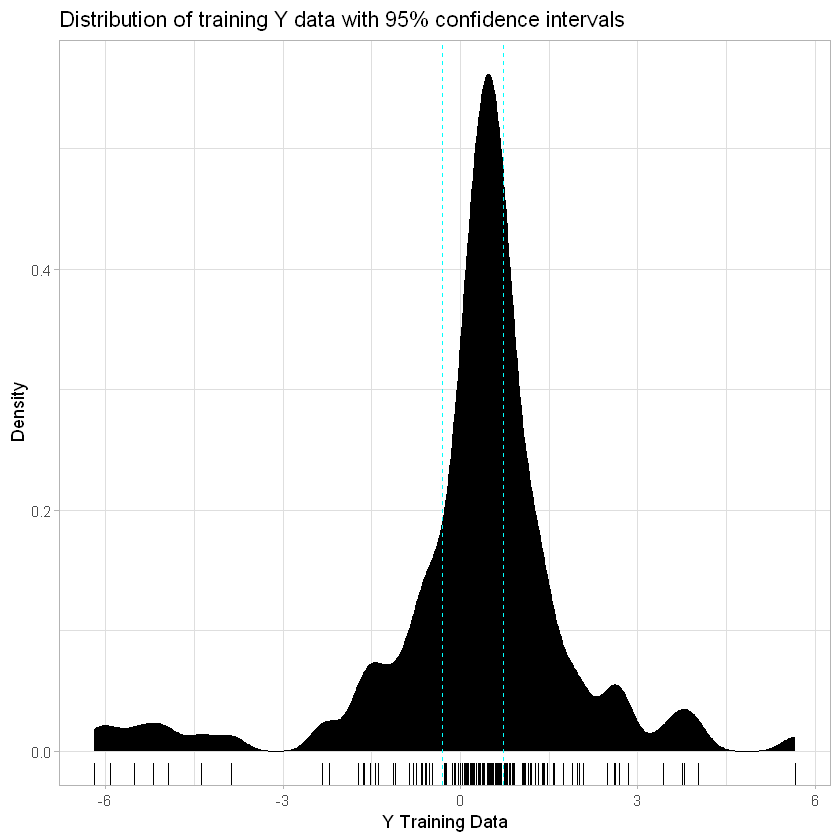

In [62]:
# Setting CI value based on t-test at the time of run
C_I1 <- -0.2974446

C_I2 <- 0.7263838


ggplot(data = data.frame(y_training_data), aes(x = y_training_data)) +
  geom_density(col = "black", fill = "black" , lw=1) +
  geom_vline(xintercept = C_I1, col = "cyan", linetype = "dashed") +
  geom_vline(xintercept = C_I2, col = "cyan", linetype = "dashed") +
  geom_rug()+

  ggtitle("Distribution of training Y data with 95% confidence intervals")+
  xlab("Y Training Data") +
  ylab("Density")

Warning message in geom_density(col = "black", fill = "black", lw = 1):
"Ignoring unknown parameters: `lw`"


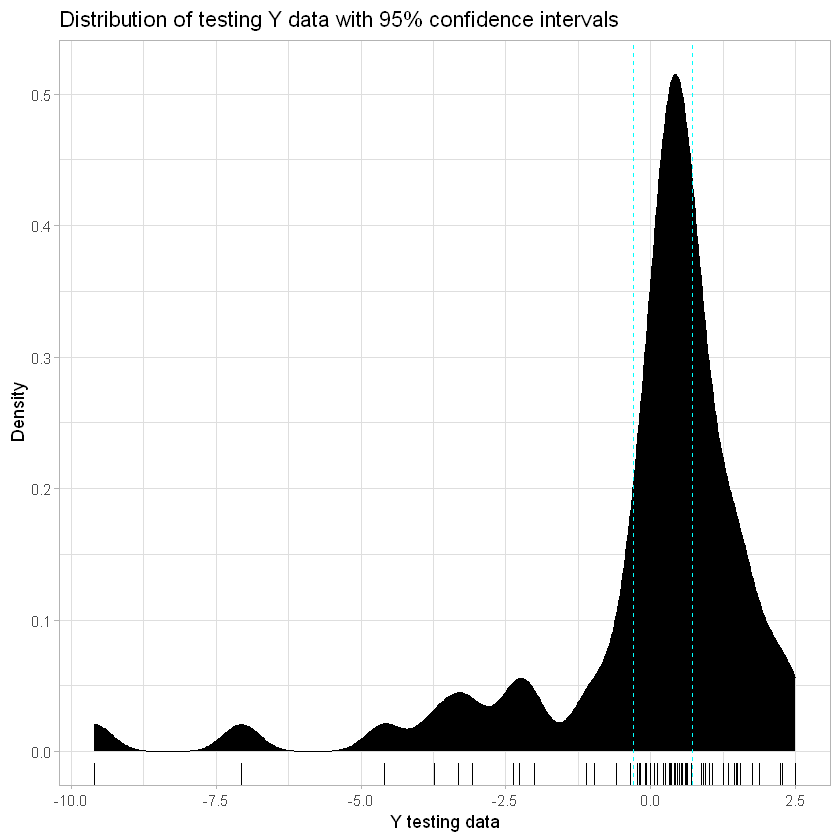

In [63]:
# Plotting distribution of testing data


ggplot(data = data.frame(y_testing_data), aes(x = y_testing_data)) +
  geom_density(col = "black", fill = "black" , lw=1) +
  geom_vline(xintercept = C_I1, col = "cyan", linetype = "dashed") +
  geom_vline(xintercept = C_I2, col = "cyan", linetype = "dashed") +
  geom_rug()+

  ggtitle("Distribution of testing Y data with 95% confidence intervals")+
  xlab("Y testing data") +
  ylab("Density")

In [64]:
# Error between actual testing data and the model's predicted output on that data

error <- ((y_testing_set - y_testing_hat)) 



# Printing error value 

print(sprintf("Error between actual testing data and the model's predicted output on that data is  %0.4f", RSS_testing))

[1] "Error between actual testing data and the model's predicted output on that data is  256.4267"


# Task 3: Approximate Bayesian Computation (ABC)


## Task 3.1: Computation of 2 parameter posterior distributions


In [65]:
# Creator vector of theta_hat of selected model 2 and sorting them to find out two largest absolute value and printing it

numbers <- c(theta_hat_2)
sorted_numbers <- sort(abs(numbers), decreasing=TRUE)
largest_two_values <- sorted_numbers[1:2]
print(largest_two_values)

[1] 0.4830657 0.1435789


In [66]:
#Choosing parameters

theta_bias <- largest_two_values[1] 
theta_four <- largest_two_values[2]

#Constant parameter

theta_one  <-  0.010038614  
theta_three   <- -0.001912836


# Initial values

arr_1 = 0
arr_2=0
f_value=0
s_value=0

theta_hat_2

y
0.483065688
0.143578928
0.010038614
-0.001912836


## Task 3.2: Using Uniform distribution as prior, around the estimated parameter values for 2 parameters

In [67]:
# Calculating epsilon 

epsilon <- RSS_model_2 * 2

# Number of iteration  to determines how many times the for loop will repeat and generate new values for the parameters.

# A larger number of iterations may result in a more accurate estimate, but will also increase the computational time.
num <- 100 

##Calculating Y-hat for performing rejection ABC 

counter <- 0

# Iteration from 0 -100 and calculating the range 

for (i in 1:num) {
range1 <- runif(1,-0.483065688,0.483065688) 
range2 <- runif(1,-0.1435789,0.1435789)

# Creating new vector of  two values from range1 and range2 with the constant values theta_one,theta_three. 
New_thetahat <- matrix(c(range1,range2,theta_one,theta_three)) 

# Calculating predicted response values for the current iteration of the loop

New_Y_Hat <- x_model_2 %*% New_thetahat 

# Calculting new RSS valur
new_RSS <- sum((y - New_Y_Hat)^2) 



# Checking if new RSS is greater than epsilon and if the condition is true, the values of range1 and range2 are stored in arrays arr_1 and arr_2 respectively. The counter is also incremented by 1. The f_value and s_value are then defined as matrices of the arrays arr_1 and arr_2 respectively.

if (new_RSS > epsilon){
arr_1[i] <- range1 
arr_2[i] <- range2 
counter = counter+1
f_value <- matrix(arr_1)
s_value <- matrix(arr_2)

  } #closing else loop
} #closing for loop

## Task 3.4: Plotting the joint and marginal posterior distribution for the parameters

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


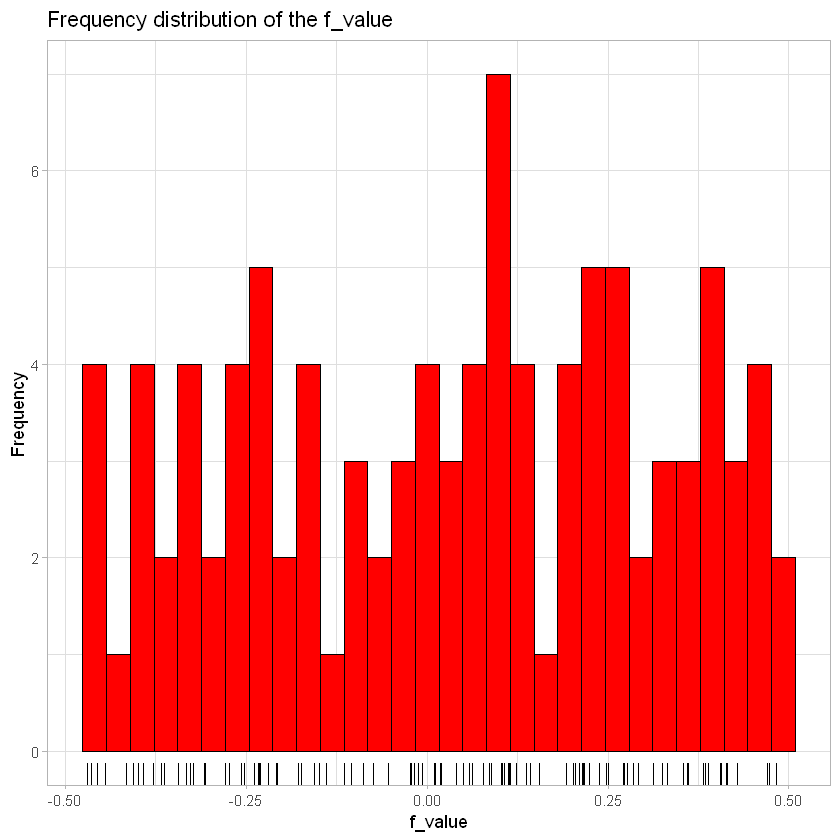

In [68]:
# Plotting histogram of new f_values and s_values

# Frequency distribution of the f_value
ggplot(data.frame(f_value), aes(x=f_value)) + 
  geom_histogram(color = 'black', fill = "red") + 
  geom_rug()+ #Show the individual observations with black lines
  labs(title = "Frequency distribution of the f_value"
       ) + 
  xlab("f_value") + 
  ylab("Frequency ") 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


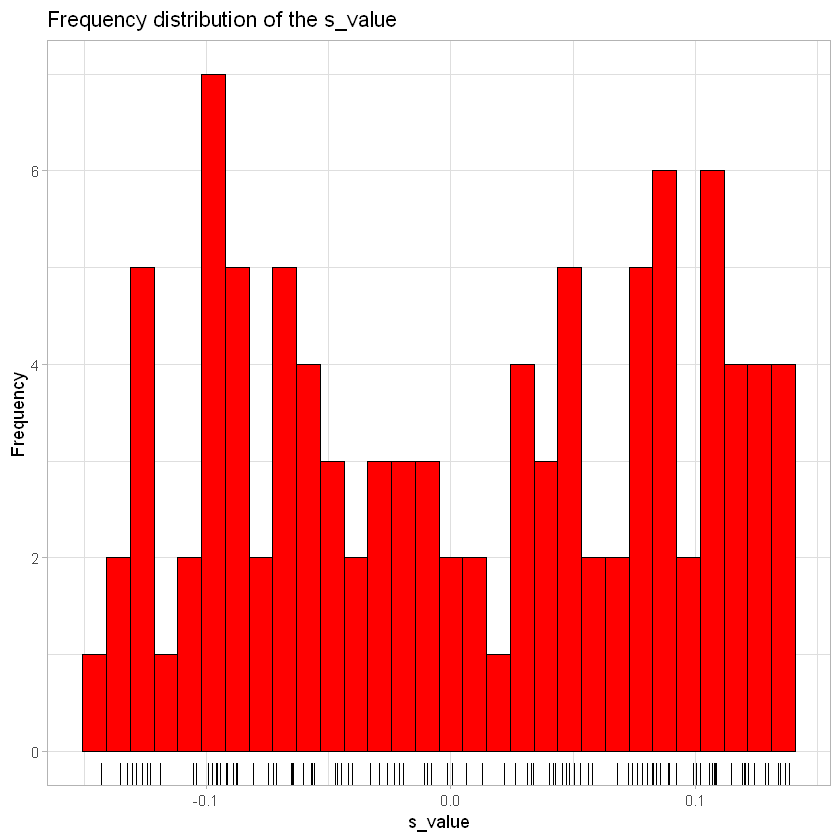

In [69]:
# Frequency distribution of the s_value
ggplot(data.frame(s_value), aes(x=s_value)) + 
  geom_histogram(color = 'black', fill = "red") + 
  geom_rug()+ #Show the individual observations with black lines
  labs(title = "Frequency distribution of the s_value"
       ) + 
  xlab("s_value") + 
  ylab("Frequency ") 

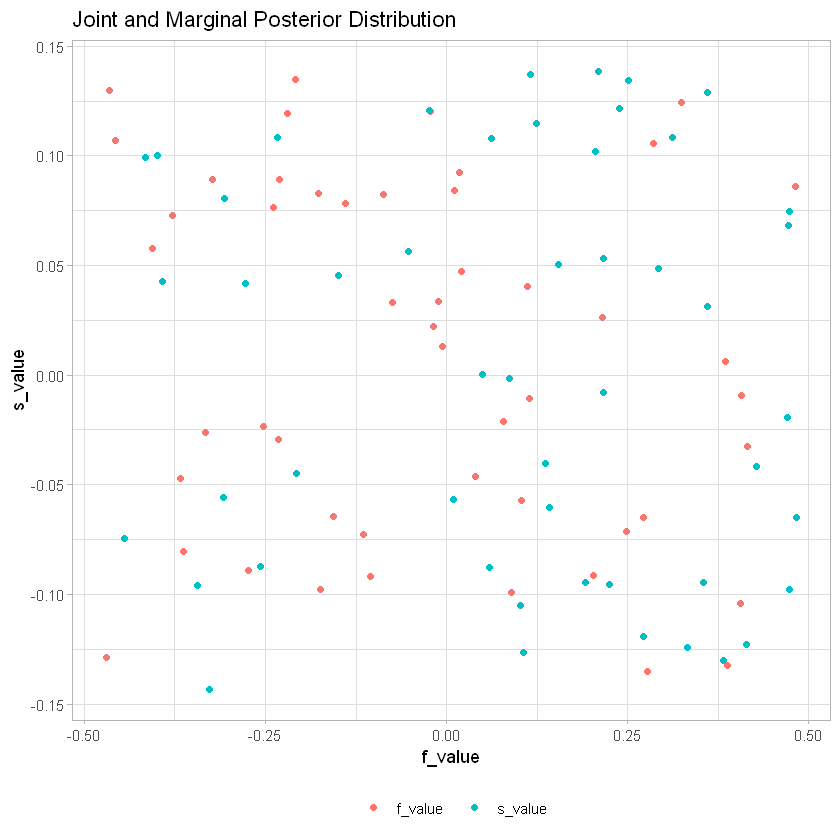

In [70]:
# The joint and marginal posterior distribution Plot

# Create a data frame with the values of f_value and s_value and a column for "group"
df <- data.frame(f_value, s_value, legend=rep(c("f_value","s_value"), each=length(f_value)/2))

# Plot the scatter plot using and hiding legends
p <- ggplot(df, aes(x=f_value, y=s_value, color=legend)) +
  geom_point()+
  theme(legend.position="bottom")+ # show legend in bottom
  theme(legend.title = element_blank())+ # hide legend word
   #guides(color=FALSE)+ # Uncomment to hide legend
  ggtitle("Joint and Marginal Posterior Distribution")
# 
# Show the plot
print(p)

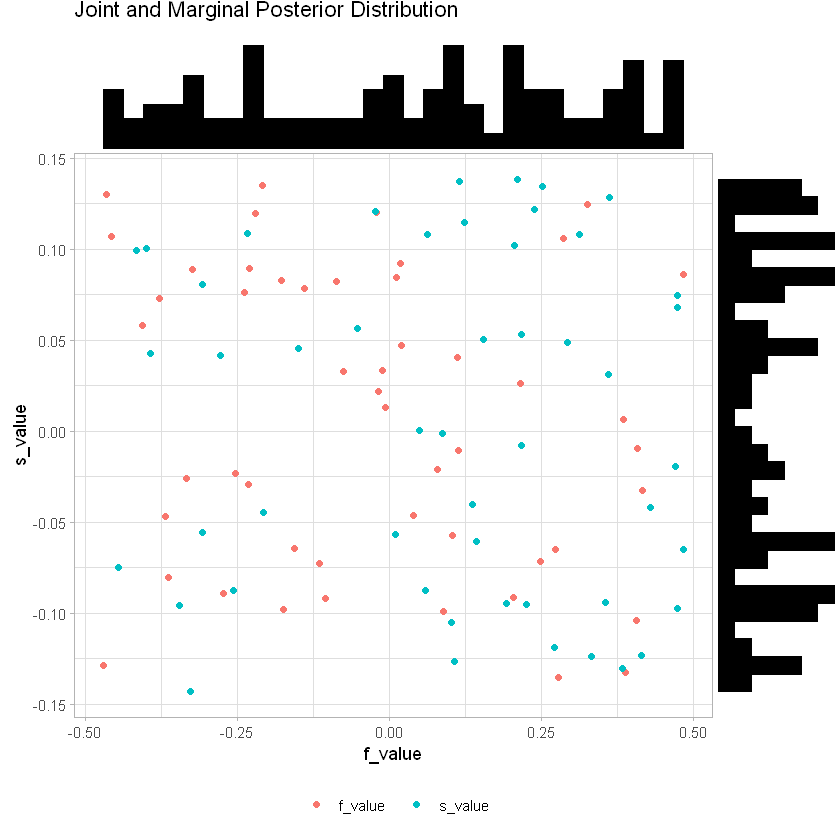

In [71]:
# The joint and marginal posterior distribution with histogram plot

# Create a data frame with the values of f_value and s_value and a column for "group"
df <- data.frame(f_value, s_value, legend=rep(c("f_value","s_value"), each=length(f_value)/2))

# Plot the scatter plot using and hiding legends
p <- ggplot(df, aes(x=f_value, y=s_value, color=legend)) +
  geom_point()+
  theme(legend.position="bottom")+
  theme(legend.title = element_blank())+
   #guides(color=FALSE)+ # Uncomment to hide legend
  ggtitle("Joint and Marginal Posterior Distribution")
# 
# # Show the plot
# print(p)


# Marginal histograms by group
ggMarginal(p, type = "histogram",
          xparams = list(fill = 1),
           yparams = list(fill = 1)) 